In [1]:
import pandas as pd
import pandas_profiling as pf
import numpy as np
import re
from sklearn import metrics

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score, precision_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

c:\Users\Brand\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\Brand\AppData\Local\Temp\ipykernel_6592\903012515.py:2: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling as pf


In [2]:
df = pd.read_csv("dataset_pishing.csv")
df.head()

,url,ip,nb_www,nb_com,nb_dslash,http_in_path,punycode,port,tld_in_path,tld_in_subdomain,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,0,1,0,0,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,1,0,0,0,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,1,0,1,0,0,0,0,0,1,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,0,0,0,0,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,0,1,0,0,0,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


In [3]:
columns = ['f1','f2', 'f4-20', 'f25', 'f26', 'f27', 'status']
cleaned_df = pd.DataFrame(columns=columns)

In [4]:
print("LEGIT", len(df[df["status"] == "legitimate"]))
print("PHISHING", len(df[df["status"] == "phishing"]))

LEGIT 5715
PHISHING 5715


In [5]:
def separate_domain(x):
    splitted_text = x.split("/")
    return splitted_text[2]

df['domain'] = df['url'].apply(separate_domain)

In [6]:
def get_length(x):
    return len(x)

#f1 url length
cleaned_df['f1'] = df['url'].apply(get_length)
#f2 hostname length
cleaned_df['f2'] = df['domain'].apply(get_length)


In [7]:
def get_special_char_len(x):
    return len(re.findall('[.@?&|=_~%/*:,;$ \-]', x))

cleaned_df['f4-20'] = df['url'].apply(get_special_char_len)

In [8]:
def isHttps(x):
    if x[0:5] == "https":
        return 1
    return 0

cleaned_df['f25'] = df['url'].apply(isHttps)

In [9]:
def digits_ratio(x):
    try:
        ratio = len(re.sub("[^0-9]", "", x)) / len(x)
        return ratio
    except:
        return 0
    
cleaned_df['f26'] = df['url'].apply(digits_ratio)
cleaned_df['f27'] = df['domain'].apply(digits_ratio)

In [10]:
def binary_status(x):
    if (x == 'legitimate'):
        return 1
    return 0

cleaned_df['status'] = df['status'].apply(binary_status)

In [11]:
aux = df.copy()
aux = aux.drop(['domain', 'status'], axis=1)
temp_df = pd.concat([aux, cleaned_df], axis=1)
data = temp_df.drop_duplicates()

In [12]:
data.head()

,url,ip,nb_www,nb_com,nb_dslash,http_in_path,punycode,port,tld_in_path,tld_in_subdomain,...,dns_record,google_index,page_rank,f1,f2,f4-20,f25,f26,f27,status
0,http://www.crestonwood.com/router.php,0,1,0,0,0,0,0,0,0,...,1,1,4,37,19,7,0,0.000000,0.0,1
1,http://shadetreetechnology.com/V4/validation/a...,1,0,0,0,0,0,0,0,0,...,0,1,2,77,23,7,0,0.220779,0.0,0
2,https://support-appleld.com.secureupdate.duila...,1,0,1,0,0,0,0,0,1,...,0,1,0,126,50,19,1,0.150794,0.0,0
3,http://rgipt.ac.in,0,0,0,0,0,0,0,0,0,...,0,0,3,18,11,5,0,0.000000,0.0,1
4,http://www.iracing.com/tracks/gateway-motorspo...,0,1,0,0,0,0,0,0,0,...,0,0,6,55,15,10,0,0.000000,0.0,1


In [13]:
num_data = data.select_dtypes(include=np.number).apply(pd.to_numeric)

## Reporte

In [14]:
rpt = pf.ProfileReport(num_data)
rpt.to_file('./report.html')

Summarize dataset:  92%|█████████▏| 73/79 [00:03<00:00, 10.78it/s, Calculate auto correlation]                  c:\Users\Brand\AppData\Local\Programs\Python\Python310\lib\site-packages\multimethod\__init__.py:315: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  return func(*args, **kwargs)
Export report to file: 100%|██████████| 1/1 [00:00<00:00,  5.69it/s]


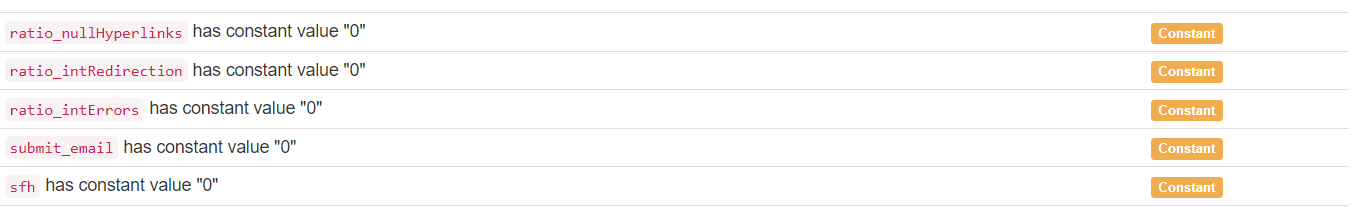

Se pueden eliminar las columnas:
- ratio_nullHyperlinks
- ratio_intRedirection
- ratio_intErrors
- submit_email
- sfh

Ya que son variables que no aportan nada al ser constantes.

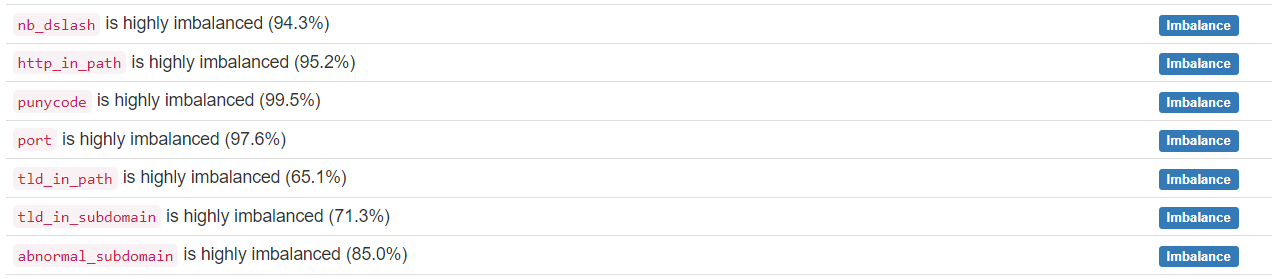

Tambien las varaibles que no son balanceadas deben de ser retiradas. Las cuales son:
- nb_dslash
- http_in_path
- punycode
- port
- tld_in_path
- tld_in_subdomain
- abnormal_subdomain
- random_domain
- path_extension
- nb_external_redirection
- domain_in_brand
- brand_in_subdomain
- brand_in_path
- suspecious_tld
- statistical_report
- login_form
- iframe
- popup_window
- onmouseover
- right_clic
- whois_registered_domain
- dns_record

In [15]:
clean_numb_data = num_data.drop([
  'ratio_nullHyperlinks',
  'ratio_intRedirection',
  'ratio_intErrors',
  'submit_email',
  'sfh',
  'nb_dslash',
  'http_in_path',
  'punycode',
  'port',
  'tld_in_path',
  'tld_in_subdomain',
  'abnormal_subdomain',
  'random_domain',
  'path_extension',
  'nb_external_redirection',
  'domain_in_brand',
  'brand_in_subdomain',
  'brand_in_path',
  'suspecious_tld',
  'statistical_report',
  'login_form',
  'iframe',
  'popup_window',
  'onmouseover',
  'right_clic',
  'whois_registered_domain',
  'dns_record',
], axis=1)
clean_numb_data = clean_numb_data.drop_duplicates()

In [16]:
rpt2 = pf.ProfileReport(clean_numb_data)
rpt2.to_file('./report_clean.html')

Summarize dataset:  88%|████████▊ | 46/52 [00:01<00:00, 13.66it/s, Calculate auto correlation]                  c:\Users\Brand\AppData\Local\Programs\Python\Python310\lib\site-packages\multimethod\__init__.py:315: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  return func(*args, **kwargs)
Export report to file: 100%|██████████| 1/1 [00:00<00:00,  4.52it/s]


## Modelo

In [17]:
X = clean_numb_data.drop(['status'], axis=1)
y = clean_numb_data['status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.218, random_state=1)

data_len = len(data)
print('Train:', round(len(X_train) / data_len, 2))
print('Val:', round(len(X_val) / data_len, 2))
print('Test:', len(X_test) / data_len)

Train: 0.54
Val: 0.15
Test: 0.2952755905511811


In [18]:
dfs = [X_train, y_train, X_test, y_test, X_val, y_val]
files_names = ['X_train', 'y_train', 'X_test', 'y_test', 'X_val', 'y_val']
for index, item in enumerate(dfs):
  item.to_csv('./data/' + files_names[index] + '.csv', sep='\t', encoding='utf-8')

## Modelo de Machine Learning k-NN

In [19]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)
y_preds = model.predict(X_val)

In [20]:
result = confusion_matrix(y_val, y_preds)
result

array([[712, 147],
       [150, 708]], dtype=int64)

In [21]:
print ('Accuracy:', accuracy_score(y_val, y_preds))
print ("Precision:", precision_score(y_val, y_preds))
print ("Recall: ", recall_score(y_val, y_preds))
print ("F1: ", f1_score(y_val, y_preds))

Accuracy: 0.8270238788584741
Precision: 0.8280701754385965
Recall:  0.8251748251748252
F1:  0.8266199649737302


## Modelo de Machine Learning Arboles de Decision

In [28]:
arbol = DecisionTreeClassifier(max_depth=4, random_state=42) 
arbol = arbol.fit(X_train, y_train)
ay_pred = arbol.predict(X_val)

In [29]:
result_arbol = confusion_matrix(y_val, ay_pred)
result_arbol

array([[781,  78],
       [ 55, 803]], dtype=int64)

In [30]:
print ('Accuracy:', accuracy_score(y_val, ay_pred))
print ("Precision:", precision_score(y_val, ay_pred))
print ("Recall: ", recall_score(y_val, ay_pred))
print ("F1: ", f1_score(y_val, ay_pred))

Accuracy: 0.9225393127548049
Precision: 0.9114642451759364
Recall:  0.9358974358974359
F1:  0.9235192639447959
